<h1 style="color:blue; font-size:50px; font-weight:bold; text-decoration:underline;">
NLP Project: Disaster Tweet Classification
</h1>

<p style="color:blue; font-size:20px; font-weight:bold; text-decoration:underline;">
Objective: To build a machine learning model that classifies tweets as disaster-related or not, using NLP techniques such as tokenization, TF-IDF, and logistic regression.
</p>

# *STEPS*:  

### Step 1 – Import Libraries  
Data analysis, visualization, NLP preprocessing, and ML ke liye required libraries import kiye.  

### Step 2 – Load Dataset  
CSV file load ki aur tweets ka raw data dekha.  

### Step 3 – Missing Values Handling  
Null values check ki aur text column ke missing rows drop kar diye.  

### Step 4 – Remove Duplicates  
Duplicate tweets identify karke remove kiye, taaki data clean ho.  

### Step 5 – Target Distribution Plot  
Disaster vs Non-disaster tweets ka percentage distribution plot kiya.  

### Step 6 – Text Statistics  
Har tweet ka character count, word count, sentence count, aur average word length calculate kiya.  

### Step 7 – Word Count Distribution  
Tweets ke word count ka histogram plot banaya to check length variation.  

### Step 8 – Word Frequency Visualization  
Top 20 sabse common words identify karke bar chart me visualize kiya.  

### Step 9 – Tokenization + Stopword Analysis  
Tweets ko tokens me todha, stopwords ka count nikala aur top 20 stopwords ka frequency chart plot kiya.  

### Step 10 – Word Cloud (Circle Shape)  
Tweets ke words ka circular shaped WordCloud generate karke frequent words visually represent kiye.  

### Step 11 – Stopword Removal + Lemmatization (Cleaning Function)  
Text ko lowercase me convert karke, stopwords aur punctuation remove kiye, aur words ko lemma form me normalize kiya.  

### Step 12 – TF-IDF Vectorization  
Cleaned tweets ko numerical features me convert kiya using TF-IDF with unigrams + bigrams (max 5000 features).  

### Step 13 – Save Cleaned CSV  
Cleaned dataset ko `cleaned_disaster_tweets.csv` file me save kiya for future use.  

### Step 14 – Train-Test Split + Model Training  
Data ko train-test sets me split karke logistic regression model train kiya.  

### Step 15 – Save Model + Vectorizer (Pickle)  
Trained model aur TF-IDF vectorizer ko `.pkl` files me save kiya taaki Streamlit app me directly load kar sake.  

### Step 16 – Model Evaluation  
Accuracy, classification report, aur confusion matrix plot karke model performance evaluate kiya.  

### Step 17 – Sample Prediction  
Trained model se ek sample tweet classify karke prediction aur probability output dekha.  


In [120]:
# -------------------------------------------------------------
#  Step 1: Import Libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle
from collections import Counter

In [122]:
# -------------------------------------------------------------
#  Step 2: Load Dataset
# -------------------------------------------------------------
df = pd.read_csv(r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Project 7\Twitter_Disaster (1).csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# ✔️ **Insight**:  
The dataset contains **tweets** with a target column:  
- `1` → Disaster Tweet  
- `0` → Non-Disaster Tweet  

In [125]:
# -------------------------------------------------------------
#  Step 3: Check Missing Values
# -------------------------------------------------------------
print(df.isnull().sum())
df = df.dropna(subset=['text']).reset_index(drop=True)

id             0
keyword       61
location    2534
text           0
target         0
dtype: int64


In [127]:
# -------------------------------------------------------------
#  Step 4: Remove Duplicates
# -------------------------------------------------------------
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates(subset=['text']).reset_index(drop=True)

Duplicate rows: 0


C:\Users\DEEPA\AppData\Local\Temp\ipykernel_13432\2934844763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=["blue", "yellow"])


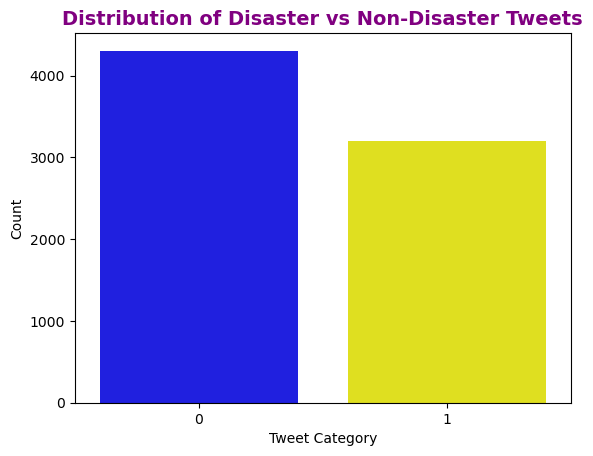

target
0    57.377049
1    42.622951
Name: proportion, dtype: float64


In [129]:
# -------------------------------------------------------------
#  Step 5: Target Distribution
# -------------------------------------------------------------
sns.countplot(x='target', data=df, palette=["blue", "yellow"])
plt.title("Distribution of Disaster vs Non-Disaster Tweets", fontsize=14, fontweight='bold', color="purple")
plt.xlabel("Tweet Category")
plt.ylabel("Count")
plt.show()
print(df['target'].value_counts(normalize=True)*100)

In [163]:
# -------------------------------------------------------------
#   Step 6: Basic Text Statistics
# -------------------------------------------------------------
df['char_count'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['sentence_count'] = df['text'].astype(str).apply(lambda x: len(sent_tokenize(x)))
df['avg_word_length'] = df['text'].astype(str).apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split())>0 else 0)

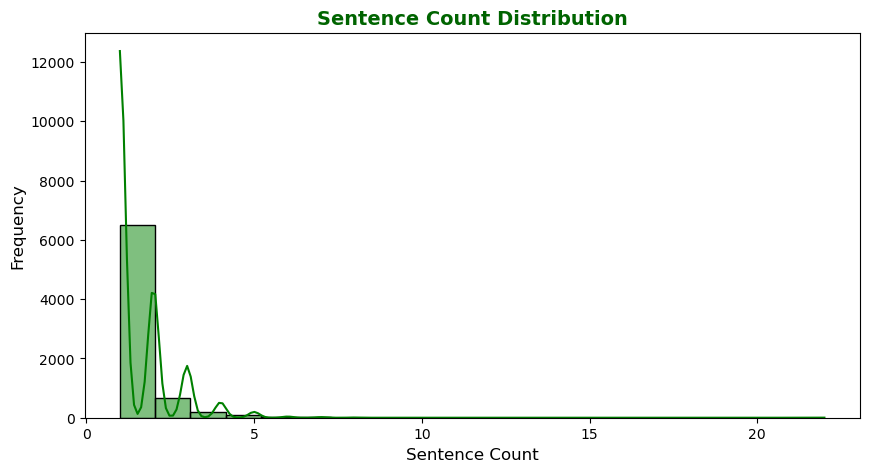

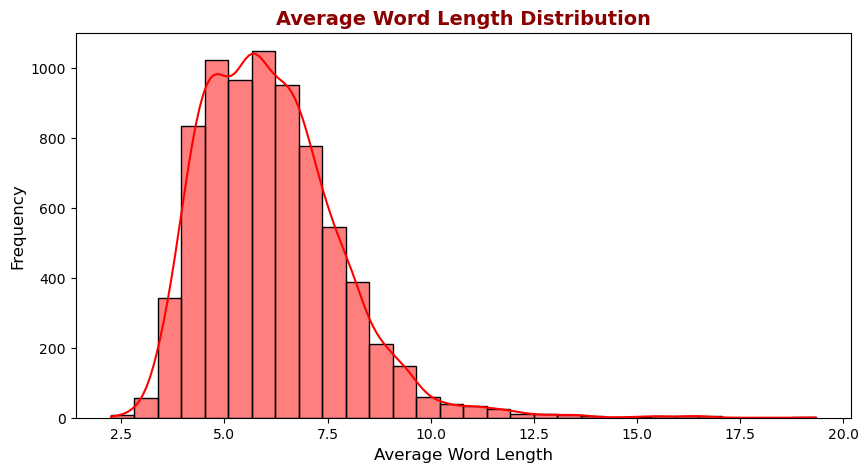

In [165]:
#  Sentence count distribution
plt.figure(figsize=(10,5))
sns.histplot(df['sentence_count'], bins=20, kde=True, color="green")
plt.title("Sentence Count Distribution", fontsize=14, fontweight="bold", color="darkgreen")
plt.xlabel("Sentence Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

#  Average word length distribution
plt.figure(figsize=(10,5))
sns.histplot(df['avg_word_length'], bins=30, kde=True, color="red")
plt.title("Average Word Length Distribution", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Average Word Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


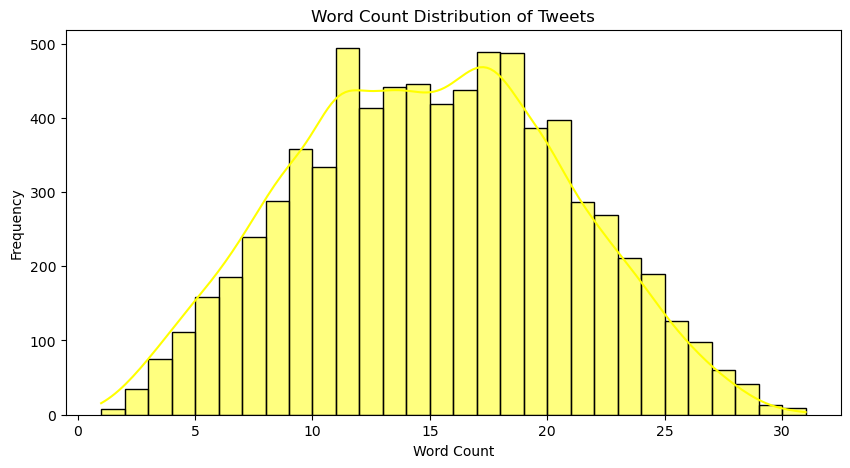

In [166]:
# -------------------------------------------------------------
#  Step 7: Word Count Distribution
# -------------------------------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=30, kde=True, color="yellow")
plt.title("Word Count Distribution of Tweets")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

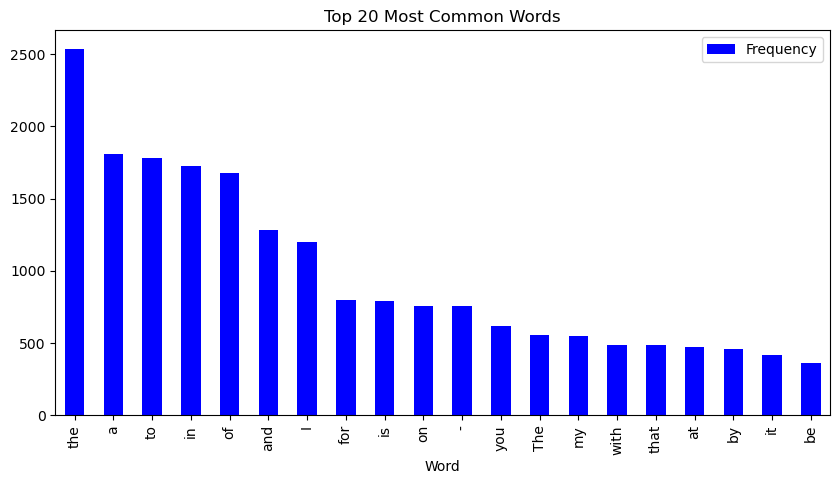

In [169]:
# -------------------------------------------------------------
#   Step 8: Word Frequency Visualization
# -------------------------------------------------------------
all_words = " ".join(df['text']).split()
word_freq = Counter(all_words)
pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency']).plot.bar(
    x='Word', y='Frequency', figsize=(10,5), color="blue"
)
plt.title("Top 20 Most Common Words")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEEPA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEEPA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample tokens: 0    [Our, Deeds, are, the, Reason, of, this, #, ea...
1     [Forest, fire, near, La, Ronge, Sask, ., Canada]
2    [All, residents, asked, to, 'shelter, in, plac...
3    [13,000, people, receive, #, wildfires, evacua...
4    [Just, got, sent, this, photo, from, Ruby, #, ...
Name: tokens, dtype: object
Stopword counts:
 0     6
1     0
2    11
3     1
4     7
Name: stopword_count, dtype: int64


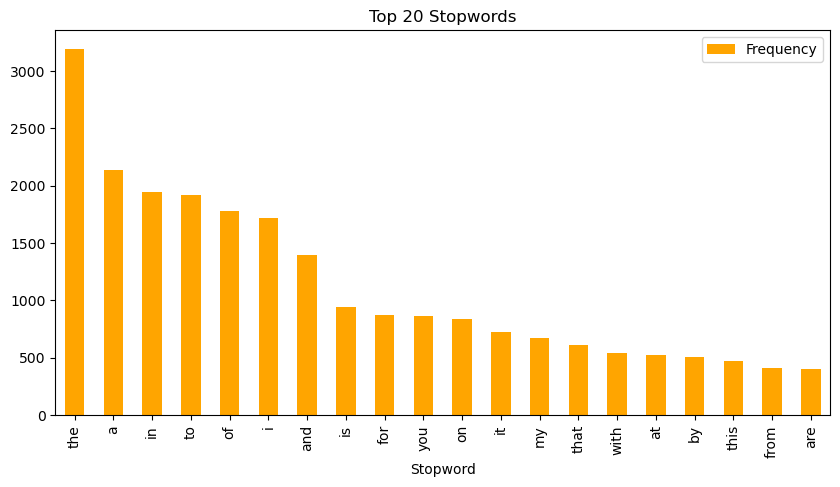

In [171]:
# Step 9: Tokenization and Stopword Analysis
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenization column
df['tokens'] = df['text'].astype(str).apply(word_tokenize)

# Stopword count column
df['stopword_count'] = df['tokens'].apply(lambda x: sum(1 for w in x if w.lower() in stop_words))

print("Sample tokens:", df['tokens'].head())
print("Stopword counts:\n", df['stopword_count'].head())

# Top 20 stopwords frequency
all_stopwords = [w.lower() for tokens in df['tokens'] for w in tokens if w.lower() in stop_words]
from collections import Counter
stopword_freq = Counter(all_stopwords)
pd.DataFrame(stopword_freq.most_common(20), columns=['Stopword','Frequency']).plot.bar(x='Stopword', y='Frequency', figsize=(10,5), color="orange")
plt.title("Top 20 Stopwords")
plt.show()


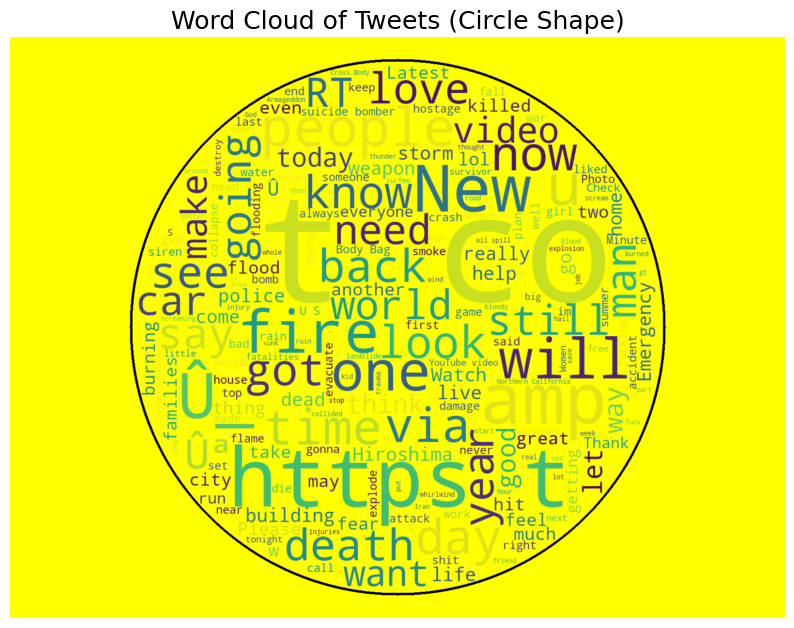

In [172]:
# -------------------------------------------------------------
#  Step 10: Word Cloud (Circle Shape)
# -------------------------------------------------------------
from wordcloud import WordCloud

# Circle mask banana
x, y = np.ogrid[:1200, :1600]
center_x, center_y = 800, 600
radius = 550
mask = (x - center_y)**2 + (y - center_x)**2 > radius**2
mask = 255 * mask.astype(int)

# WordCloud generate karna using 'text' column
wordcloud = WordCloud(
    width=1600,
    height=1200,
    background_color="yellow",
    mask=mask,
    contour_color='black',
    contour_width=5
).generate(" ".join(df['text']))

# Display WordCloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets (Circle Shape)", fontsize=18)
plt.show()


In [173]:
# -------------------------------------------------------------
#  Step 11 : Stopword Removal & Lemmatization
# -------------------------------------------------------------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w not in string.punctuation]
    return " ".join(tokens)

df['clean_text'] = df['text'].astype(str).apply(clean_text)
df[['text','clean_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEEPA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEEPA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEEPA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked 'shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive wildfire evacuation orde..."
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...


In [174]:
# -------------------------------------------------------------
#  Step 12 : TF-IDF Vectorization
# -------------------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']

# Save the vectorizer
import pickle
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [176]:
# -------------------------------------------------------------
# Step 13: Save Cleaned CSV
# -------------------------------------------------------------
# Load CSV (ensure path is correct)
df = pd.read_csv(r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Project 7\cleaned_disaster_tweets.csv")

# Save locally (optional duplicate path for backup)
df.to_csv("cleaned_disaster_tweets.csv", index=False)
df.to_csv(r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Project 7\cleaned_disaster_tweets.csv", index=False)

print("✅ Cleaned CSV saved successfully!")

✅ Cleaned CSV saved successfully!


In [177]:
# -------------------------------------------------------------
#  Step 14: Train-Test Split & Model Training
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [183]:
# -------------------------------------------------------------
#  Step 15 : Save Model & Vectorizer
# -------------------------------------------------------------
with open("disaster_tweet_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and Vectorizer saved successfully!")

✅ Model and Vectorizer saved successfully!


Accuracy: 0.7921385742838108
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.81      0.66      0.73       627

    accuracy                           0.79      1501
   macro avg       0.80      0.77      0.78      1501
weighted avg       0.79      0.79      0.79      1501



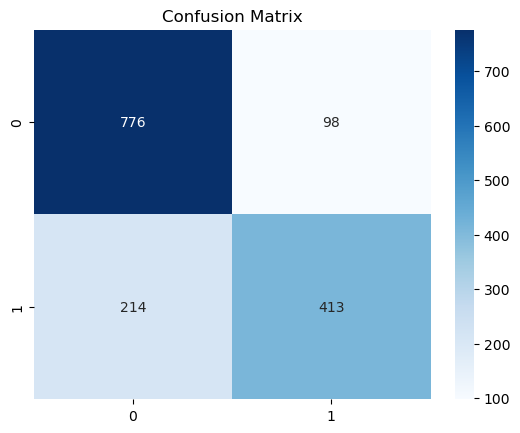

In [185]:
# -------------------------------------------------------------
#  Step 16: Model Evaluation
# -------------------------------------------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [187]:
# -------------------------------------------------------------
# Step 17: Sample Prediction
# -------------------------------------------------------------
import pickle

# Load saved vectorizer and model
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))
model = pickle.load(open("disaster_tweet_model.pkl", "rb"))

# Example tweet for prediction
sample_tweet = "There was a huge earthquake in the city and many buildings collapsed."

# Transform and predict
sample_vec = vectorizer.transform([sample_tweet])
prediction = model.predict(sample_vec)[0]
proba = model.predict_proba(sample_vec)[0]

# Display result
print("Tweet:", sample_tweet)
print("Prediction (1=Disaster, 0=Not Disaster):", prediction)
print("Prediction Probability:", proba)


Tweet: There was a huge earthquake in the city and many buildings collapsed.
Prediction (1=Disaster, 0=Not Disaster): 1
Prediction Probability: [0.42744396 0.57255604]
